In [2]:
#tablice wielowymiarowe w Julii
Asmall=[[1.0 0.0]; [0.0 1.0]]
Bsmall=Asmall
#size(B,1)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [3]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

naive_multiplication (generic function with 1 method)

In [4]:
#kompilacja
naive_multiplication(Asmall,Bsmall)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [5]:
#kompilacja funkcji BLASowej do mnożenia macierzy
#https://docs.julialang.org/en/stable/stdlib/linalg/#BLAS-Functions-1
Asmall*Bsmall

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [6]:
A=rand(1000,1000);
B=rand(1000,1000);

In [7]:
# Należy pamiętać o "column-major" dostępie do tablic - 
# pierwszy indeks zmienia się szybciej
# tak jak Matlab, R, Fortran 
# inaczej niz C, Python
A1 = [[1 2]; [3 4]]
vec(A1)

4-element Array{Int64,1}:
 1
 3
 2
 4

In [8]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
#można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [9]:
better_multiplication(Asmall, Bsmall)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [10]:
@elapsed naive_multiplication(A,B)

4.063740528

In [11]:
@elapsed better_multiplication(A,B)

2.00211698

In [12]:
@elapsed A*B

0.077202301

In [13]:
using Polynomials
xs = 0:10; ys = map(x->exp(x), xs)
fit1=polyfit(xs, ys,3)

Poly(-1086.8658708490402 + 2905.5721994684973*x - 1082.7457238744728*x^2 + 100.44658880845468*x^3)

In [14]:
fit1(1)

836.4071935534389

In [15]:
polyval(fit1, 1)

836.4071935534389

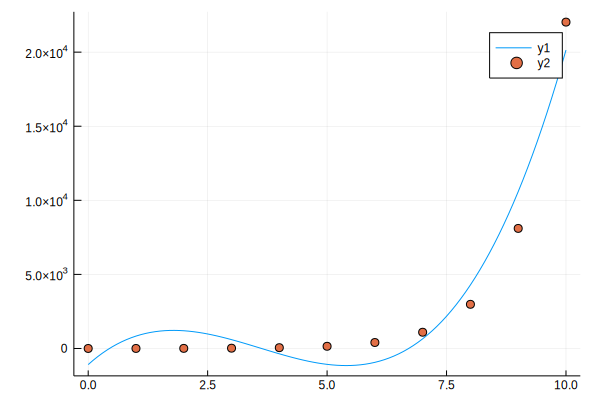

In [16]:
using Plots

# geste punkty do wyliczenia wartosci wielomianu aproksymujacego:
xd=0:0.1:10
# wykres wartosci wielomianu dla gestych punktow:
plot(xd,polyval(fit1, xd))

# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs,ys)

In [34]:
using Plots

x_axis=100:100:500

y_axis = []
y_axis1 = []
y_axis2 = []

c1 = open("naive.csv","w")
c2 = open("better.csv","w")
c3 = open("blas.csv","w")

for i in 1:10
    for x in x_axis
        append!(y_axis, @elapsed naive_multiplication(rand(x, x), rand(x, x)))
        cur=@elapsed naive_multiplication(rand(x, x), rand(x, x))
        write(c1, "$x,$cur\n")
        append!(y_axis1, @elapsed better_multiplication(rand(x, x), rand(x, x)))
        cur=@elapsed better_multiplication(rand(x, x), rand(x, x))
        write(c2, "$x,$cur\n")
        append!(y_axis2, @elapsed rand(x, x)*rand(x, x))
        cur=@elapsed rand(x, x)*rand(x, x)
        write(c3, "$x,$cur\n")
    end
end

close(c1)
close(c2)
close(c3)

BoundsError: BoundsError: attempt to access 5-element StepRange{Int64,Int64} at index [1:50]

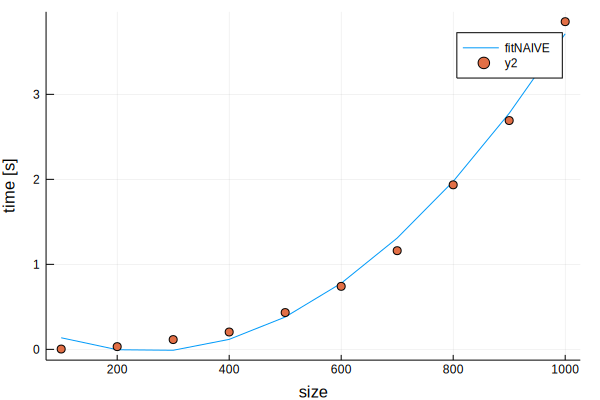

In [47]:
using Plots

x_axis=100:100:1000

y_axis = []
y_axis1 = []
y_axis2 = []

for x in x_axis
    append!(y_axis, @elapsed naive_multiplication(rand(x, x), rand(x, x)))
    append!(y_axis1, @elapsed better_multiplication(rand(x, x), rand(x, x)))
    append!(y_axis2, @elapsed rand(x, x)*rand(x, x))
end

fit1=polyfit(x_axis, y_axis,2)
xd=100:100:1000
plot(x_axis, polyval(fit1, xd), labels =["fitNAIVE"], xlabel = "size", ylabel = "time [s]")
scatter!(x_axis,y_axis)